In [1]:
import cv2
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pathlib import Path

import pathlib
import pandas as pd

from XRayDataset import XRayDataset

In [2]:
pwd()

'/home/lisettesolis/30254-pneumoniacs/predict-pneumonia'

In [13]:
# using cv2
# read in the image

img = cv2.imread("data/test/PNEUMONIA/person1_virus_11.jpeg", cv2.IMREAD_UNCHANGED)
print(img.shape)
print(type(img.shape))

(560, 872)
<class 'tuple'>


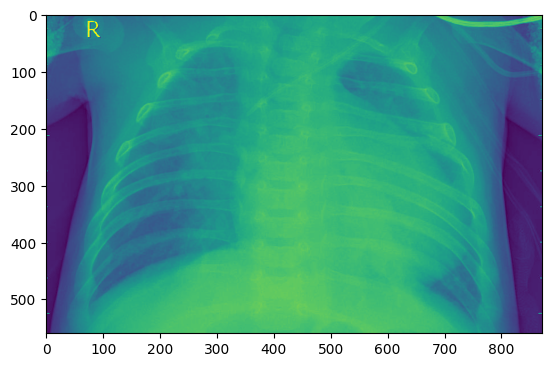

In [14]:
plt.imshow(img)

In [10]:
train_dataset = XRayDataset('data/csv_files/train.csv')
image, label = train_dataset.__getitem__(3)
print(image.shape)
print(label)
print(type(image))
plt.imshow(image)

TypeError: resize() takes 1 positional argument but 2 were given

In [7]:
[train_dataset.data['ratio'].mean()]*3

[0.7146625766871166, 0.7146625766871166, 0.7146625766871166]

In [ ]:
train_dataset.data['ratio'].std()

0.11852999113579582

In [6]:
length = train_dataset.data['length'].mean()
ratio = train_dataset.data['ratio'].mean()

transform = T.Compose([
    T.ToPILImage(), # Convert numpy array to PIL Image
    T.RandomAdjustSharpness(sharpness_factor=2),
    T.RandomPosterize(bits=4, p=0.5),
    T.Resize((int(length), int(length/ratio))), # Resize the image
    T.ToTensor(), # Convert PIL Image to tensor
    T.Normalize(mean=[train_dataset.data['ratio'].mean()]*3, std=[train_dataset.data['ratio'].std()]*3) # Normalize the image
])

tensor = transform(image)
print(tensor)
print(tensor.shape)

plt.imshow(tensor.permute(1, 2, 0))

NameError: name 'image' is not defined

In [12]:
transform = T.Compose([
    T.ToPILImage(), # Convert numpy array to PIL Image
        T.RandomAdjustSharpness(sharpness_factor=2),
        T.RandomPosterize(bits=4, p=0.5)
])

tensor = transform(image)
print(tensor)

NameError: name 'image' is not defined

In [ ]:
for i in range(0, len(train_dataset)):
    

range(0, 5216)